# Parcial Final

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
from itertools import permutations
from itertools import combinations
from itertools import combinations_with_replacement

### Punto A

##### Definir probabilidad prior

In [2]:
States = np.array([0,1]) 
Prior =  np.array([0.2,0.8])

In [3]:
T = np.array([[0.8,0.2],[0.2,0.8]])

E = np.array([[0.5,0.9],[0.5,0.1]])

In [4]:
DictH = {0:'Justa',1:'Sesgada'}

In [5]:
DictO = {0:'Cara',1:'Sello'}

In [6]:
def GetHiddenStates(States, N):
    
    CStates = list( combinations_with_replacement(States,N) )
    
    Permu = []
    
    for it in CStates:
        p = list(permutations(it,N))
        
        for i in p:
            if i not in Permu:
                Permu.append(i)
    return np.array(Permu)

In [7]:
HiddenStates = GetHiddenStates(States,8)

In [8]:
def GetProb(T,E,Obs,State,Prior):
    
    n = len(Obs)
    p = 1.
    
    p *= Prior[State[0] ]
    
    for i in range(n-1):
        p *= T[ State[i+1], State[i] ]
    
    
    
    for i in range(n):
        p *= E[ Obs[i], State[i] ]
    
    return p

In [9]:
dim = HiddenStates.shape[0]
P = np.zeros(dim)
Obs=np.array([1,0,0,0,1,0,1,0])
for i in range(dim):
    P[i] = GetProb(T,E,Obs,HiddenStates[i],Prior)

### Punto B

##### Hallar hidden state con mayor probabilidad

In [10]:
maxP = np.max(P)
ii = np.where( P == np.amax(P))
print(HiddenStates[ii],maxP)

[[1 1 1 1 0 0 0 0]] 0.0001911029760000001


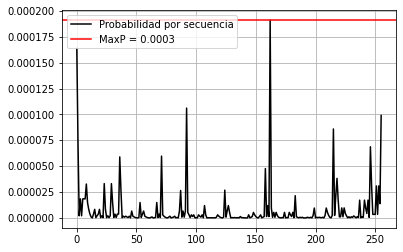

In [11]:
plt.plot(P,color='k',label='Probabilidad por secuencia')
plt.axhline(y=maxP,c='r',label='MaxP = 0.0003')
plt.legend(loc='upper left')
plt.grid()

In [12]:
ObsStates = GetHiddenStates([0,1],8)

In [13]:
NObs = ObsStates.shape[0]

PObs = np.zeros(NObs)

for j in range(NObs):
    
    dim = HiddenStates.shape[0]
    P = np.zeros(dim)
    
    for i in range(dim):
        P[i] = GetProb(T,E,ObsStates[j],HiddenStates[i],Prior)
        
    PObs[j] = np.sum(P)

### Punto C

##### Calcular probabilidades de cada estado observable

In [14]:
maxP_ = np.max(PObs)
ii = np.where( PObs == np.amax(PObs))
print(ObsStates[ii],maxP_)

[[0 0 0 0 0 0 0 0]] 0.13698241367042568


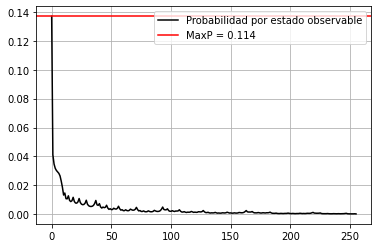

In [15]:
plt.plot(PObs,label='Probabilidad por estado observable',c='k')
plt.axhline(y=maxP_,c='r',label='MaxP = 0.114')
plt.legend(loc='upper right')
plt.grid()

### Punto D

##### Suma de estados observados

Por errores de truncamiento el valor es ligeramente mayor a 1 con un error mínimo.

In [16]:
np.sum(PObs)

1.0000000000000007

### Punto E

##### ¿Depende el resultado de la probabilidad a-priori?

Como se puede ver en el código el valor de las probabilidades de las estados observables y la probabilidad del estado oculto más probable dependen claramente de la probabilidad a-priori usada para las monedas justa y sesgada. Si por ejemplo cambiamos a una probabilidad a-priori de:
$$ \pi=[0.4,0.6] $$

Se obtiene una variación considerable en el estado oculto más probable:

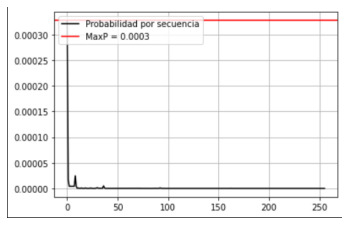

In [17]:
image = mpimg.imread("hidden_apriori_0406.png")
plt.imshow(image)
plt.axis('off')
plt.show()

Y una mínima variación en la probabilidad por estado observable:

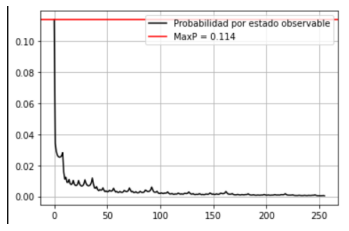

In [18]:
image = mpimg.imread("obs_apriori_0406.png")
plt.imshow(image)
plt.axis('off')
plt.show()